# Bike Sharing Demand


### Step 1. Importing necessary packages and libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

### Step 2. Importing the data and creating a dataframe

In [59]:
bikes_data = pd.read_csv("SeoulBikeData.csv")

### Step 3. Preporcessing the dataframe

In [60]:
# Checking the dataset for missing values and getting the general overview of the dataset
print(bikes_data.isnull().sum())

# Converting the 'Date' column to datetime object to datetime object
bikes_data['Date'] = pd.to_datetime(bikes_data['Date'])
bikes_data

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Library/Frameworks/Python.framework/Versions/3.1

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Step 4. Getting verview of correlation within the dataset.

<AxesSubplot:>

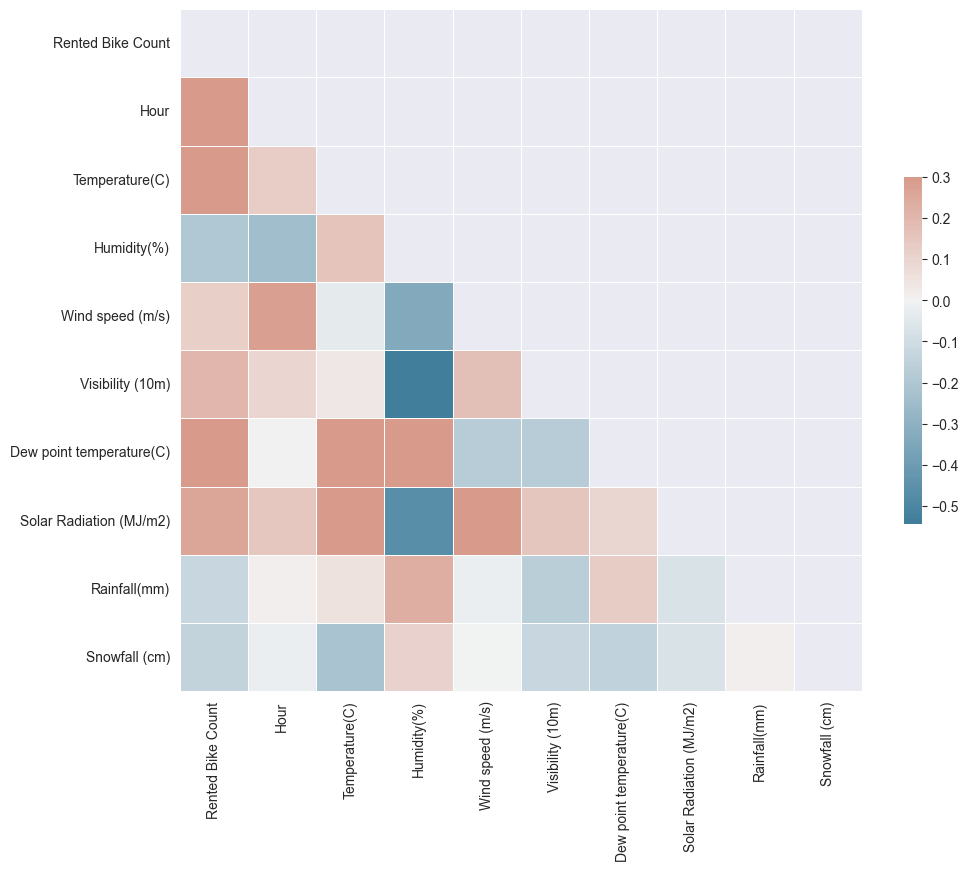

In [87]:
# Computing the correlation matrix
corr = bikes_data.corr()

# Generating a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Setting up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Step 5. Finding the average number of bikes rented at different times (morning, afternoon, evening) year-round

        Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0 2017-01-12                254     0            -5.2           37   
1 2017-01-12                204     1            -5.5           38   
2 2017-01-12                173     2            -6.0           39   
3 2017-01-12                107     3            -6.2           40   
4 2017-01-12                 78     4            -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(C)  \
0               2.2              2000                     -17.6   
1               0.8              2000                     -17.6   
2               1.0              2000                     -17.7   
3               0.9              2000                     -17.6   
4               2.3              2000                     -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                 

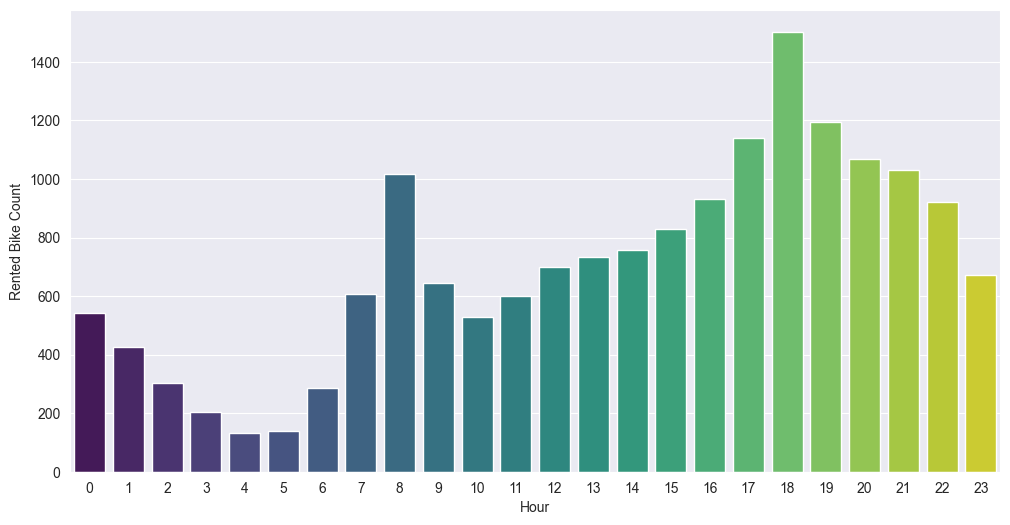

705


In [61]:
# Getting the overview of the dataset
print(bikes_data.head())

# Finding total number of bikes rented per hour per day
rented_bikes = bikes_data['Rented Bike Count'].groupby(bikes_data['Hour']).sum()/365

# Finding the average number of bikes rented per hour in thee morning (between 4 and 11AM) 
morning_bikes = rented_bikes[4:12].mean()
print(round(morning_bikes))

# Finding the average number of bikes rented per hour in the afternoon (between 12 and 4PM)
afternoon_bikes = rented_bikes[12:17].mean()
print(round(afternoon_bikes))

# Finding the average number of bikes rented per hour in the evening (between 5 and 11PM)
evening_bikes = rented_bikes[17:24].mean()
print(round(evening_bikes))

# Plotting the hourly renting of bikes
plt.figure(figsize=(12,6))
sns.barplot(data=bikes_data, x=rented_bikes.index, y=rented_bikes, palette='viridis')
plt.show()

# Checking that the mean on the plot is the same as calculated using a formula
print(round(rented_bikes.mean()))

### Step 6. Visualizing the findings with Seaborn

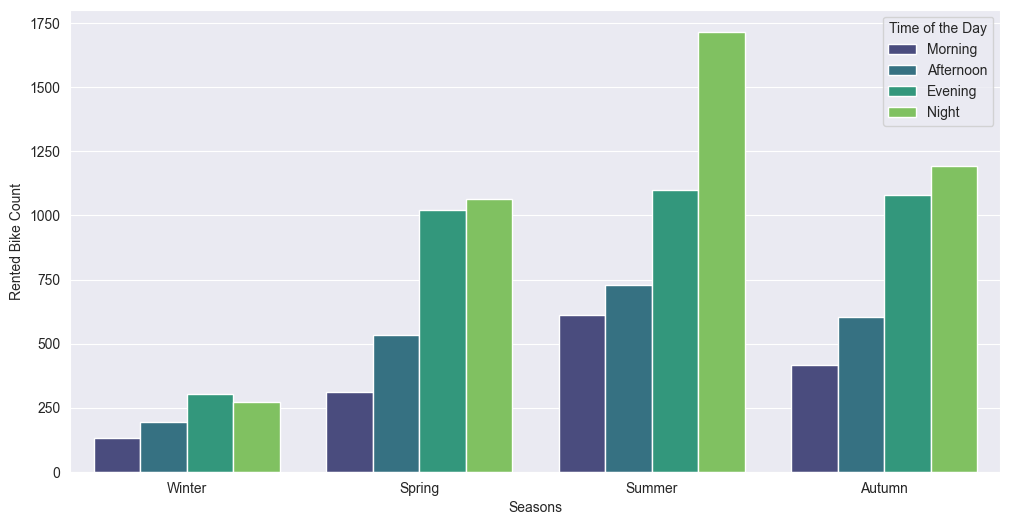

In [67]:
# Visualizing the average number of bikes rented at different times (morning, afternoon, evening) per season with Seaborn

bikes_data = bikes_data.astype(dict.fromkeys(bikes_data.select_dtypes(np.int64).columns, np.int16))

plt.figure(figsize=(12,6))
bikes_data['Time of the Day'] = 'Morning'
mask = (bikes_data['Hour'] >= 4) & (bikes_data['Hour'] <= 12)
bikes_data.loc[mask,'Time of the Day'] = 'Afternoon'
mask = (bikes_data['Hour'] > 12) & (bikes_data['Hour'] <= 17)
bikes_data.loc[mask,'Time of the Day'] = 'Evening'
mask = (bikes_data['Hour'] > 17) & (bikes_data['Hour'] <= 23)
bikes_data.loc[mask,'Time of the Day'] = 'Night'
mask = (bikes_data['Hour'] < 4 ) & (bikes_data['Hour'] >= 23)

sns.barplot(x='Seasons', y='Rented Bike Count', data=bikes_data, hue='Time of the Day', errorbar=None, palette='viridis')
plt.show()

### Step 7. Exploring the relationship between the temperature and the demand

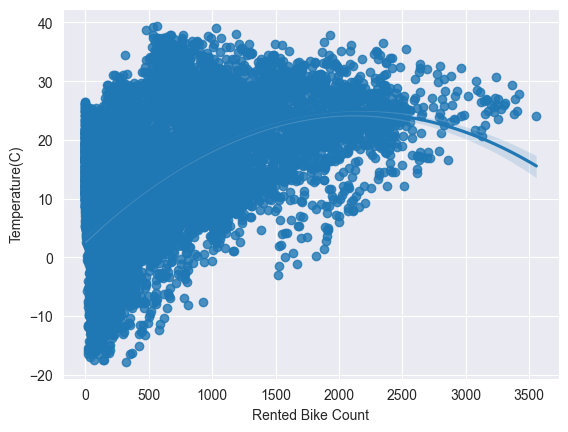

In [63]:
sns.set_style('darkgrid')
sns.regplot(x='Rented Bike Count', y='Temperature(C)', data=bikes_data, order=2)
plt.show()

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 